In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df=pd.read_csv(r"C:\Users\sowja\Downloads\Visadataset - Visadataset (2).csv")
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**Box Plot**

- Box plot is used for detect outliers

- Box Plot has min q1  q2   q3 and max values

- Inside plot red line represents median which 50 percentile data

**Outlier**

- Very very huge observation

- very very small observation

- which pull the data in any side of the distribution

- Mild Outliers

    - q1-1.5*IQR and q3+1.5 IQR
- Strong Outliers
    
    - q1-3*IQR and q3+3 IQR

- IQR :inter quartile range
    
    - IQR=Q3-Q1
 
- q1:25p
- q2:50p
- q3:75p 

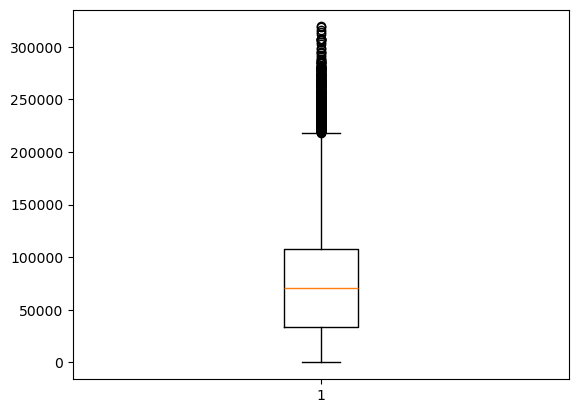

In [11]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

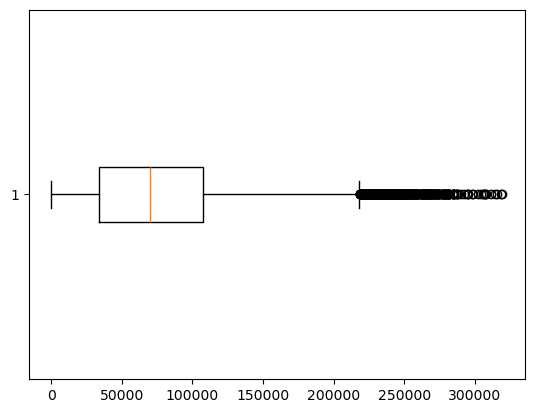

In [12]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

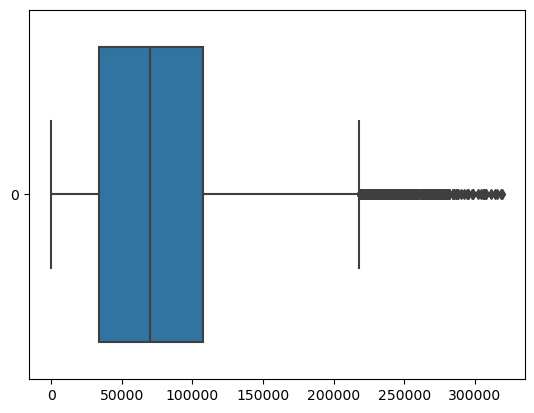

In [18]:
sns.boxplot(visa_df['prevailing_wage'],
           orient=')


(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

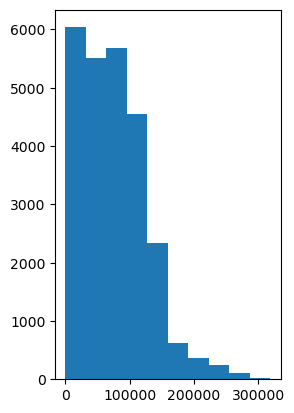

In [20]:
# box plot and sub plor(1,2,1),(1,2,2) doing combine (easy method) 

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])


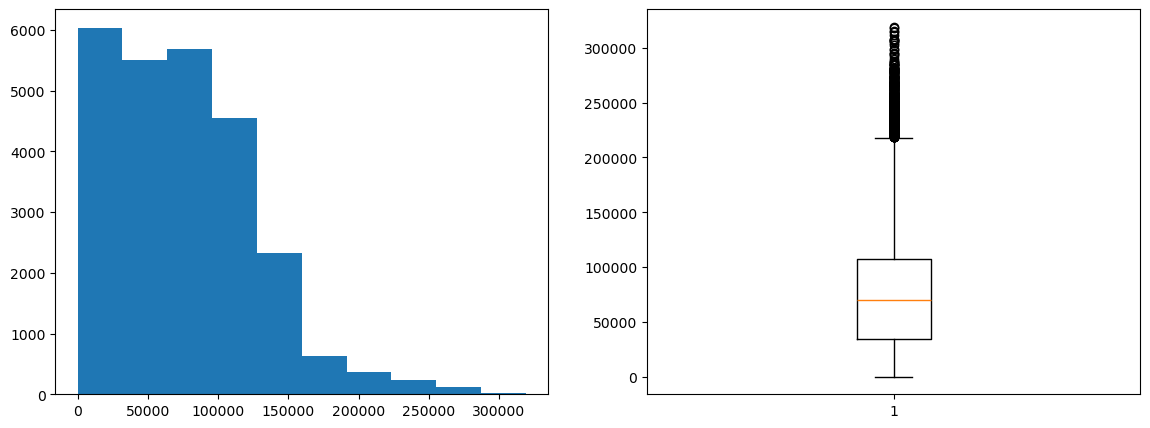

In [32]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the Outliers**

- Outliers are avalible less than q1-1.5*IQR

- Outliers are avalible grater than q3+1.5*IQR

   - Step-1:
        - calculate Q1
    
        - calculate Q3
          
        - calculate IQR: Q3-Q1
          
    - step-2:
        - LB=Q1-1.5*IQR
     
        - UB=Q3+1.5*IQR
        
    - Step-3:
       - con1=visa_df['prevailing_wage']<LB
         
       - con2=visa_df['prevailing_wage']>UB
     
       - Apply or operate and get the outliers data

**NON_outliers_data**

In [27]:
Q1= round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3= round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR= Q3-Q1
##########################################################
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
######Q#######################################################
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
NON_outliers_data=visa_df[con1+con2]


In [28]:
len(NON_outliers_data)

427

**Histogram NON_outliers_data**

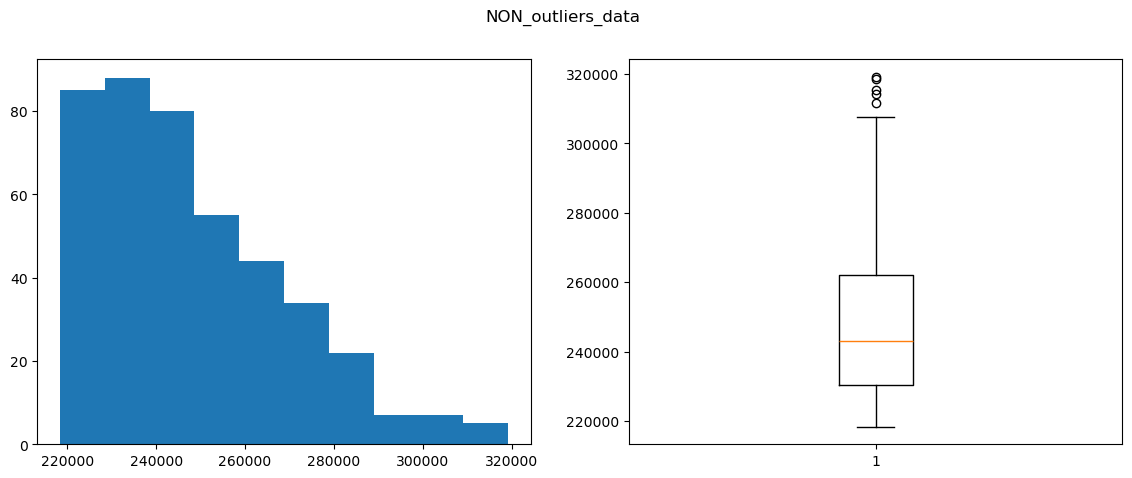

In [36]:
plt.figure(figsize=(14,5))
plt.suptitle('NON_outliers_data')
plt.subplot(1,2,1).hist(NON_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(NON_outliers_data['prevailing_wage']) # 25053
plt.show()

**Comparing Total data with non outliers data**


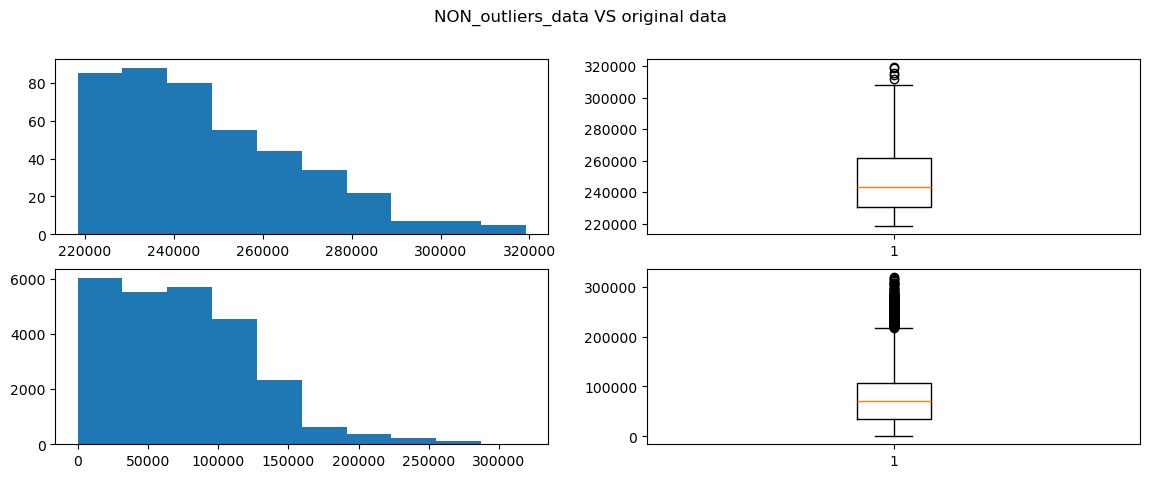

In [39]:
plt.figure(figsize=(14,5))   # 14 units in X-axis ,5 units in Y-axis
plt.suptitle('NON_outliers_data VS original data')
plt.subplot(2,2,1).hist(NON_outliers_data['prevailing_wage']) # 25053
plt.subplot(2,2,2).boxplot(NON_outliers_data['prevailing_wage']) # 25053


plt.subplot(2,2,3).hist(visa_df['prevailing_wage']) # 25053
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage']) # 25053
plt.show()


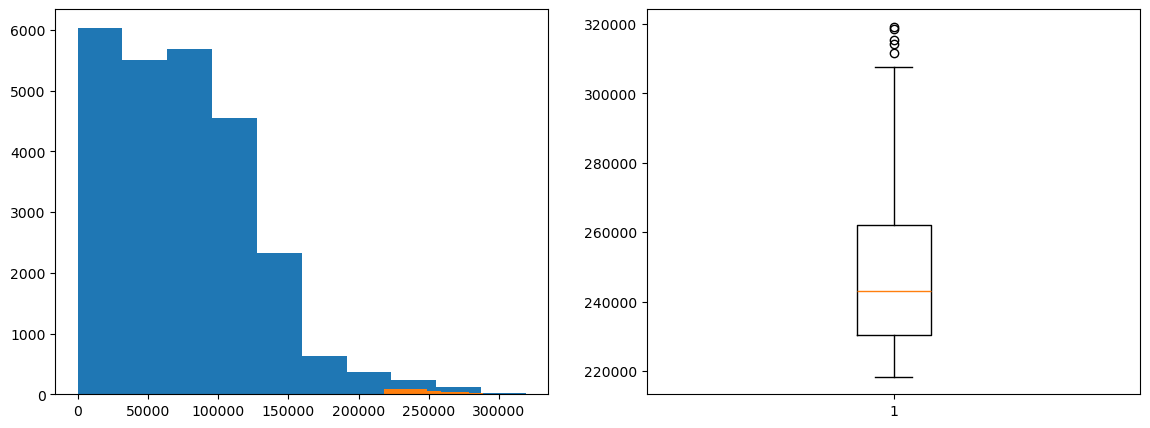

In [41]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage']) # 25053
plt.subplot(1,2,1).hist(NON_outliers_data['prevailing_wage']) # 25053
plt.subplot(1,2,2).boxplot(NON_outliers_data['prevailing_wage']) # 25053
plt.show()

**How to deal the outliers**

**Method-1**: Drop the outliers

    -  Drop the outliers is not a good idea
 
    -  when you drop the outliers,data will loss
    -  For example here we are droping 427 rows
 
    -  X% of 25480=427
 
    -  It is 1.7 data , here is fine we can drop the outliers ,generally it is not a good idea
 
**Method-2** :Fill with median value

    - we already knoe that does not effect the median

    - so we can fill outlier by median

**Method-3**:cap the values with Q1 or Q3

    - all lesthan lower bound values , we can replace with q1 or LB

    - all greater than upper bound values , we can replace with q3 or UB
   

**Fill with median**

- create a empty list

- calculate median value:visa_df['prevailing_wage'].median

- iterate through visa_df['prevailing_wage'].values

- if each value i.e.i,ub then append with median values

- else appen with i

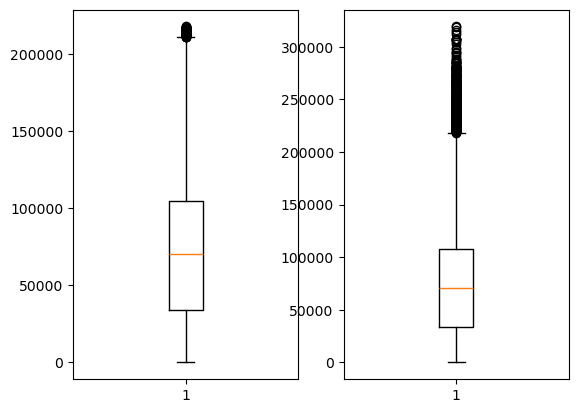

In [47]:
l1=[]
median= visa_df['prevailing_wage'].median()

Q1= round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3= round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR= Q3-Q1
##########################################################
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR
#############################################################
for value in (visa_df['prevailing_wage'].values):
    if value <LB or value> UB:
        l1.append(median)
    else:
        l1.append(value)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**

- np.where will use for binary condition

- It has 3 aruguments
  
    - condition
 
    - value if condition is True
 
    - value if condition is False

In [51]:
# example
d={"sub":["DS","ML","CS"],
  "Marks":[100,50,29]}
data=pd.DataFrame(d)
data

# 

,sub,Marks
0,DS,100
1,ML,50
2,CS,29


In [53]:
d={"sub":["DS","ML","CS"],
  "Marks":[100,150,29]}
data=pd.DataFrame(d)
data

,sub,Marks
0,DS,100
1,ML,150
2,CS,29


In [54]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
l

array([100,   1,  29], dtype=int64)

In [57]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1|con2
median = visa_df['prevailing_wage'].median()


new_data=np.where(con,median,visa_df['prevailing_wage'])
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])